In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Часть I. Нахождение корней. Метод Ньютона.

Напишите алгоритм, который выполняет итерации Ньютона для заданной функции $f(x)$ с известной производной $f'(x)$. Ваша функция должна находить корни $f(x)$ с заданной точностью $\epsilon$.

In [1]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Нахождение корней $f(x) = 0$ через итерации Ньютона, начиная с x0.
    
    Parameters
    ----------
    f : callable
        Функция, корни которой мы хотим найти.
    fder : callable
        Производная `f`.
    x0 : float
        Начальное приближение итераций Ньютона.
    eps : float
        Заданная точность. 
        Алгоритм прекращает работу когда расстояние между последовательными приближениями меньше `eps`.
        По умолчанию 1e-5.
    maxiter : int
        Максимальное число итераций (по умолчанию 1000).
        Алгоритм прекращается, когда число итераций достигает `maxiter`.
        Этот параметр нужен лишь для предотвращения бесконечного зацикливания.
    
    Returns
    -------
    x : float
        Найденное приближение к корню.
    niter : int
        Количество итераций.
    """
    ###BEGIN SOLUTION
    it = 0
    x = x0
    while abs(f(x)) > eps and it < maxiter:
        x = x - f(x)/fder(x)
        it+=1
    return x, it
    ###END SOLUTION

### Test I.1 

Протестируйте вашу функцию на простом примере $f(x) = x^2 - 1$. (20% итоговой оценки)

In [16]:
def test1(x):
    return x**2 - 1
def test1der(x):
    return 2 * x
###BEGIN HIDDEN TESTS
def test1hidden(x):
    return x**2-5.6*x+3
def test1derhidden(x):
    return 2*x-5.6

xList = [-1000, -100, -10, 10, 10000]
for i in xList:
    assert test1(newton_iteration(test1, test1der, i)[0]) < 1e-5
    assert test1hidden(newton_iteration(test1hidden, test1derhidden, i)[0]) < 1e-5
###END HIDDEN TESTS

### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

m= 1 result is 1.0010190389301679 number of iterations is 25
m= 2 result is 1.0000714038711747 number of iterations is 9
m= 3 result is 1.0011825820421454 number of iterations is 11
m= 4 result is 99.99999999980673 number of iterations is 1000
m= 5 result is -1.2895268672886702 number of iterations is 1000
minimal number of iterations is reached when m=2, e.g equal multiplity of a root
 Непосредственно скорость сходимости оценивают по тангенсу угла наклона логарифмического графика зависимости (x_i-1) от (x_(i-1)-1)
 if m=1, converage is linear and it is bad. We can see it on graphics: tangens is nearly 1 at first picture and bigger then 1 at second
limits are (25, 9)


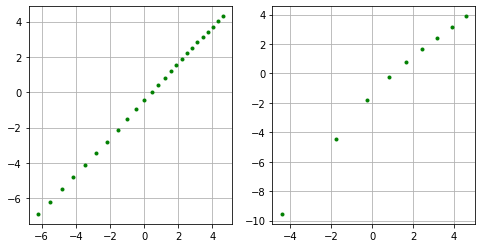

In [17]:

def smart_newton(f, fder, x0, m=1, eps=1e-5, maxiter=1000): 
    it = 0
    x = x0 
    while abs(f(x)) > eps and it < maxiter and fder(x)!=0:
        x = x - m * f(x)/fder(x)
        it+=1
    return x, it

def test2(x):
    return (x**2 - 1)**2
def test2der(x):
    return 4*(x**2 - 1)*x

for param in range(1,6):
    res, it = smart_newton(test2, test2der, 100, m=param)
    print('m=', param, 'result is', res,'number of iterations is', it)

def test(f, fder, x0, answer, m=1, eps=1e-5, maxiter=1000): 
    it1 = 0
    x = x0 
    while abs(f(x)) > eps and it1 < maxiter and fder(x)!=0:
        ax1.plot(np.log(x-1), np.log(x - f(x)/fder(x)-1), '.', color = 'green')
        x = x - f(x)/fder(x)
        it1+=1
    x = x0
    it2 = 0
    while abs(f(x)) > eps and it2 < maxiter and fder(x)!=0:
        ax2.plot(np.log(x-1), np.log(x - m * f(x)/fder(x)-1), '.', color = 'green')
        x = x - m * f(x)/fder(x)
        it2+=1
    ax1.grid()
    ax2.grid()
    return it1, it2
print('minimal number of iterations is reached when m=2, e.g equal multiplity of a root')
print(' Непосредственно скорость сходимости оценивают по тангенсу угла наклона логарифмического графика зависимости (x_i-1) от (x_(i-1)-1)\n if m=1, converage is linear and it is bad. We can see it on graphics: tangens is nearly 1 at first picture and bigger then 1 at second')

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(8, 4))
print('limits are',test(test2, test2der, 100, 1, m=2))

# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

We can see that the root is nearly 0.64. Lets check it
Newton iterations finded root at 0.6417143710025017 with 3 iterations


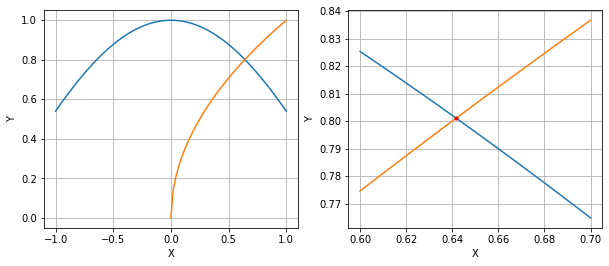

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

x1 = np.linspace(-1,1,100)
x2 = np.linspace(0.6,0.7,100)

ax1.plot(x1,np.cos(x1), np.linspace(0,1,50), np.sqrt(np.linspace(0,1,50)))

#Подписи графиков и все такое
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.plot(x2,np.cos(x2), x2, np.sqrt(x2))
ax1.grid()
ax2.grid()

def test3(x):
    return np.cos(x) - np.sqrt(x)
def test3der(x):
    return -np.sin(x) - 1/2/np.sqrt(x)

print('We can see that the root is nearly 0.64. Lets check it')
root, it = newton_iteration(test3, test3der, 1)
print('Newton iterations finded root at', root, 'with', it, 'iterations')
ax2.plot(root, np.cos(root),'.', color='red')